# Investigation Into Ill timed Analysis
## By Terry Bondy, VA3TYB

In [2]:
printf(strftime ("Last updated: %A %e %B %Y", localtime (time ())))

Last updated: Tuesday 21 January 2020

In [3]:
load "VA3TYB_A_s.mat"

In [4]:
load "VA3TYB_Phi_d.mat"

In [5]:
size(VA3TYB_A_s)

ans =

   551     1



In [6]:
size(VA3TYB_Phi_d)

ans =

   275     1



In [7]:
sampleRate = 8000
period = 3;
TshortRV = [0:1/sampleRate:1](:);
TfullRV = [0:1/sampleRate:period](:);

sampleRate =  8000


In [8]:
RaisedCosineRV = (1 - cos(2*pi*TshortRV))/2;
size(RaisedCosineRV)

ans =

   8001      1



In [9]:
fcLow = 200;

In [10]:
SigRV = zeros(rows(TfullRV), 1);
freq = fcLow;
for idx = 1:1:rows(VA3TYB_Phi_d)
  if VA3TYB_A_s(idx) != 0
    phi = VA3TYB_Phi_d(idx);
    SigRV = SigRV .+ exp(j*(2*pi*freq * TfullRV + VA3TYB_Phi_d(idx)));
  endif
  freq += 4;
endfor

SigRV = SigRV .+ exp(j*2*pi*freq * TfullRV);
freq += 4;

for idx = rows(VA3TYB_Phi_d):-1:1
  if VA3TYB_A_s(idx) != 0
    phi = VA3TYB_Phi_d(idx);
    SigRV = SigRV .+ exp(j*(2*pi*freq * TfullRV - VA3TYB_Phi_d(idx)));
  endif
  freq += 4;
endfor
freq

freq =  2404


In [11]:
SigSec0RV = SigRV(1:rows(RaisedCosineRV)) .* RaisedCosineRV;
size(SigSec0RV)

ans =

   8001      1



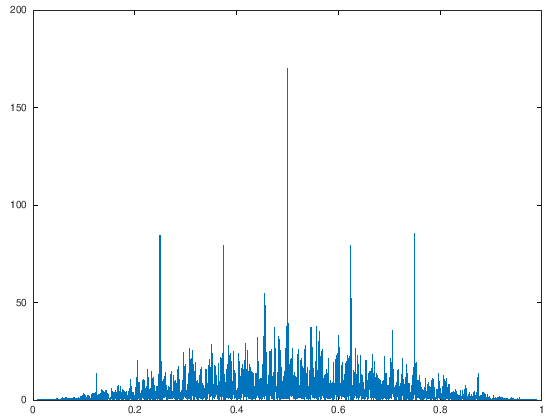

In [12]:
plot(TshortRV, abs(SigSec0RV));

In [13]:
FftSec0RV = fftshift(fft(SigSec0RV, sampleRate*10 + 1));
AbsFftSec0RV = abs(FftSec0RV);
FreqSec0RV = [linspace(-sampleRate/2, sampleRate/2, rows(FftSec0RV))](:);

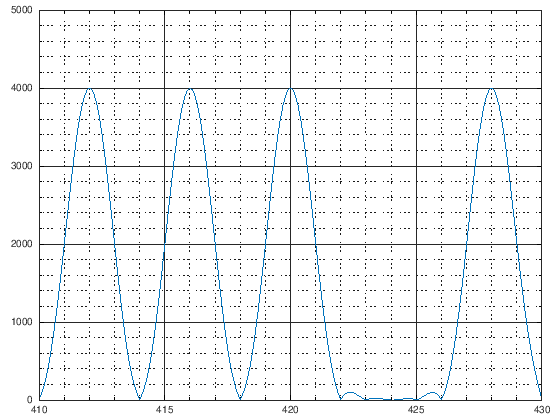

In [14]:
plot(FreqSec0RV, AbsFftSec0RV)
grid on
grid minor
axis([410 430], "tic")

In [15]:
pkg load signal

In [16]:
[PeaksCV idxPeaksCV] = findpeaks(AbsFftSec0RV, "MinPeakHeight", 500);

In [17]:
size(idxPeaksCV)

ans =

   229     1



In [18]:
FreqSec0RV(idxPeaksCV)

ans =

    412
    416
    420
    428
    432
    436
    444
    452
    456
    460
    476
    484
    488
    492
    500
    516
    520
    524
    532
    536
    540
    548
    580
    584
    588
    596
    604
    620
    652
    660
    668
    676
    680
    684
    700
    708
    712
    716
    732
    740
    748
    756
    760
    764
    772
    776
    780
    796
    800
    804
    820
    824
    828
    836
    844
    848
    852
    860
    864
    868
    884
    888
    892
    900
    908
    916
    948
    956
    964
    972
    976
    980
    996
   1004
   1008
   1012
   1028
   1036
   1044
   1052
   1056
   1060
   1068
   1072
   1076
   1092
   1096
   1100
   1116
   1120
   1124
   1132
   1140
   1144
   1148
   1156
   1160
   1164
   1180
   1184
   1188
   1196
   1204
   1212
   1228
   1236
   1244
   1248
   1252
   1260
   1264
   1268
   1276
   1284
   1300
   1316
   1324
   1332
   1336
   1340
   1348
   1352
   1356
   1364
 

In [19]:
FftSec0RV(idxPeaksCV)

ans =

   3999.242 +   64.398i
   1386.641 + 3751.881i
   3999.507 +   66.309i
   3999.627 +   66.999i
  -2981.966 + 2665.950i
   3999.063 +   68.728i
   3999.291 +   69.787i
   3998.939 +   70.886i
   3755.974 + 1375.540i
   3999.668 +   72.434i
   3999.192 +   74.820i
    570.831 + 3958.893i
   3998.832 +   77.061i
   3999.555 +   77.457i
   1872.166 + 3534.745i
    328.958 + 3986.289i
   3998.660 +   82.260i
   3999.480 +   82.299i
    856.326 + 3906.751i
  -1634.898 + 3650.610i
   2154.535 + 3370.337i
   -715.958 + 3935.343i
   2939.886 + 2711.649i
   3999.483 +   91.683i
  -2633.180 + 3010.393i
    579.599 + 3957.677i
   3998.738 +   94.943i
   -778.099 + 3923.434i
   3998.552 +  102.448i
  -2227.980 + 3321.737i
     16.302 + 3999.823i
  -3998.818 -  106.559i
   2588.859 + 3047.767i
   2758.715 + 2896.925i
   3998.326 +  110.302i
  -1715.577 + 3612.515i
   -494.861 + 3969.573i
  -3998.309 -  111.770i
   -176.116 + 3995.832i
   1219.863 + 3809.213i
    821.539 + 3914.531i
  -2556.3

In [20]:
arg(FftSec0RV(idxPeaksCV))

ans =

   0.016101
   1.216781
   0.016578
   0.016750
   2.412089
   0.017184
   0.017448
   0.017724
   0.351057
   0.018108
   0.018707
   1.427594
   0.019268
   0.019364
   1.083714
   1.488461
   0.020569
   0.020574
   1.355017
   1.991854
   1.002006
   1.750758
   0.745035
   0.022920
   2.289454
   1.425381
   0.023739
   1.766577
   0.025616
   2.161605
   1.566721
  -3.114951
   0.866634
   0.809831
   0.027580
   2.014162
   1.694820
  -3.113646
   1.614843
   1.260876
   1.363929
   2.264222
  -3.111874
   0.030010
   1.645031
   1.889466
   1.747915
   1.944610
   0.031610
  -3.110052
   1.443239
   1.547782
   2.177700
   1.649461
  -3.108394
   1.914350
  -3.108321
   1.777140
   2.480907
   1.254296
   1.451884
   1.329868
  -3.106761
   1.699126
   1.424456
  -3.105661
  -3.104376
   2.019658
   2.361514
   1.945062
   1.812720
  -3.103334
   1.859834
  -3.102187
  -3.101899
   2.399372
   2.538379
  -3.100941
   1.934415
  -3.100124
   2.350436
   1.820446
   1.8752

In [21]:
SigSec0ConvRV = SigRV(1:rows(SigSec0RV)) .* SigSec0RV;
size(SigSec0ConvRV)

ans =

   8001      1



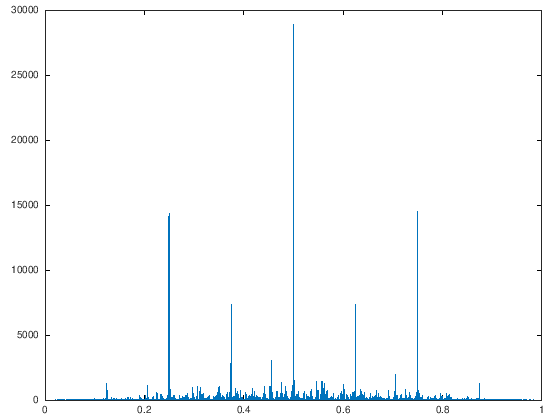

In [22]:
offset = 0;
plot(TshortRV, abs(SigRV(1+offset:rows(SigSec0RV)+offset) .* SigSec0RV))

In [23]:
fracSeconds = rows(TshortRV)-1;
indexIncr = (rows(TshortRV)-1)/fracSeconds;
MaxPeakValue = [];
for startIndex = 1:1:rows(SigSec0RV)
  time = TfullRV(startIndex);
  SigLoopRV = SigRV(startIndex:startIndex+rows(SigSec0RV)-1) .* SigSec0RV;
  SigLoopAbsRV = abs(SigLoopRV);
  maxPeakIdx = find(SigLoopAbsRV(:) == max(SigLoopAbsRV));
  MaxPeakValue = [MaxPeakValue; SigLoopAbsRV(maxPeakIdx)];
endfor

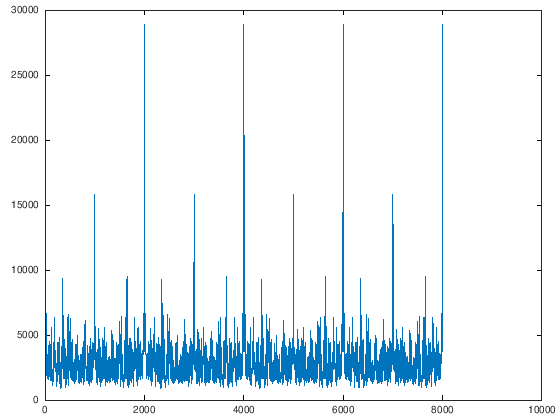

In [24]:
plot(MaxPeakValue)

In [25]:
FftSec0ConvRV = fftshift(fft(SigSec0ConvRV, sampleRate*10 + 1));
AbsFftSec0ConvRV = abs(FftSec0ConvRV);
FreqSec0ConvRV = [linspace(-sampleRate/2, sampleRate/2, rows(FftSec0ConvRV))](:);

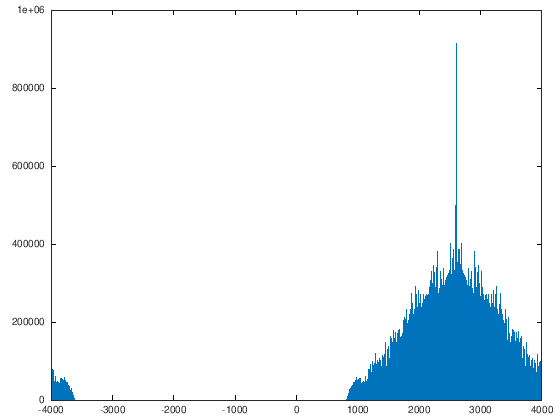

In [26]:
plot(FreqSec0ConvRV, AbsFftSec0ConvRV)


In [27]:
find(AbsFftSec0ConvRV(:) == max(AbsFftSec0ConvRV))

ans =  66001


In [28]:
FreqSec0ConvRV(ans)

ans =  2600


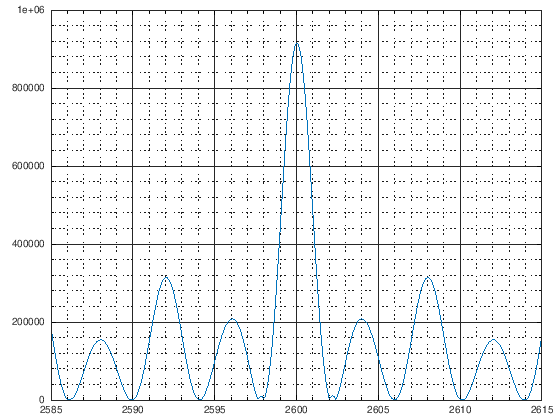

In [29]:
plot(FreqSec0ConvRV, AbsFftSec0ConvRV)
grid on
grid minor
axis([2600-15 2600+15], "tic")

In [30]:
fracSeconds = rows(TshortRV)-1;
indexIncr = (rows(TshortRV)-1)/fracSeconds;
FreqMaxPeak = [];
MaxPeakValue = [];
for startIndex = 1:indexIncr:rows(SigRV)-rows(SigSec0RV)-1
  time = TfullRV(startIndex);
  SigLoopRV = SigRV(startIndex:startIndex+rows(SigSec0RV)-1) .* SigSec0RV;
  FftLoopRV = fftshift(fft(SigLoopRV, sampleRate*10 + 1));
  FftLoopAbsRV = abs(FftLoopRV);
  FreqLoopRV = linspace(-sampleRate/2, sampleRate/2, rows(FftLoopRV));
  maxPeakIdx = find(FftLoopAbsRV(:) == max(FftLoopAbsRV));
  FreqMaxPeak = [FreqMaxPeak; FreqLoopRV(maxPeakIdx)];
  MaxPeakValue = [MaxPeakValue; FftLoopAbsRV(maxPeakIdx)];
endfor

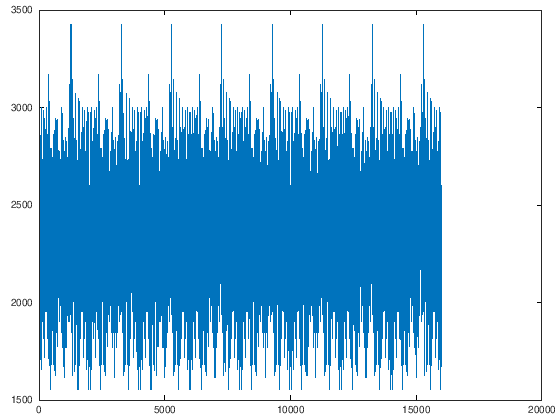

In [31]:
plot(FreqMaxPeak)

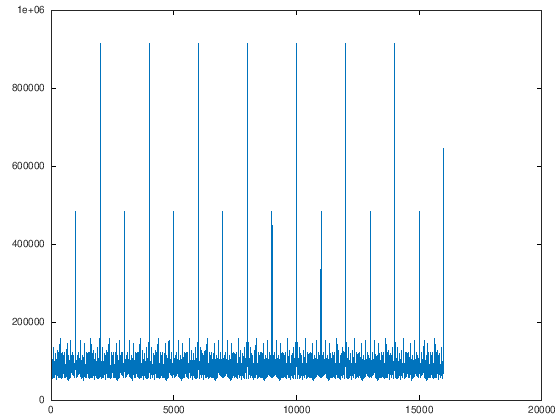

In [32]:
plot(MaxPeakValue)